In [8]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud  # Import WordCloud from the wordcloud library
import matplotlib.pyplot as plt


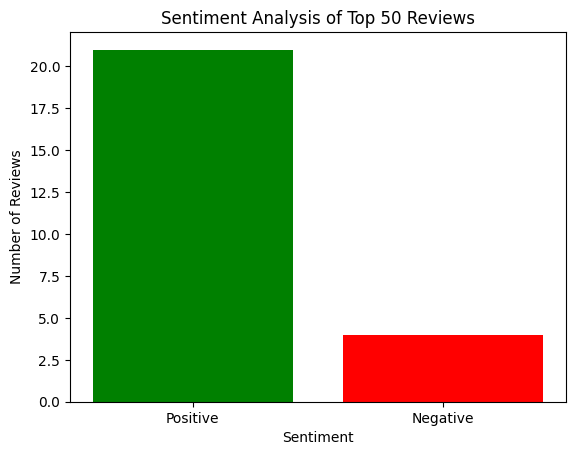

Positive Reviews: 21
Negative Reviews: 4
Average Positive Sentiment: 0.203606940116479
Average Negative Sentiment: -0.12015729166666664


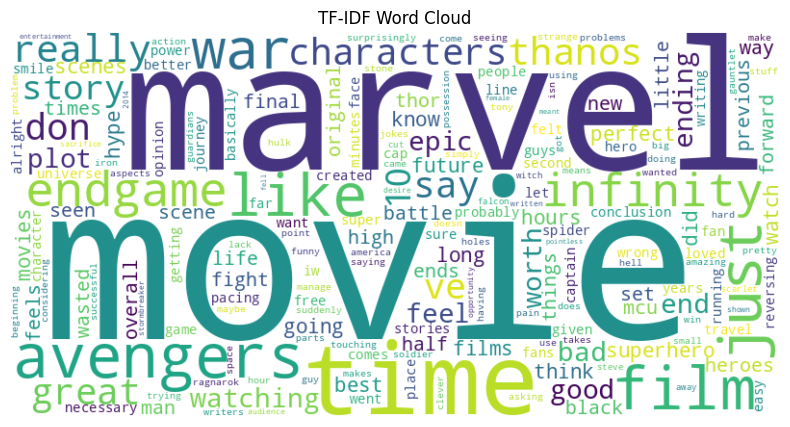

In [10]:

# Define the IMDb URL for a movie review
url = "https://www.imdb.com/title/tt4154796/reviews"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the review elements
    review_elements = soup.find_all('div', class_='text show-more__control')

    if review_elements:
        # Initialize counters for neutral, negative, and positive reviews
        #neutral_reviews = 0
        negative_reviews = 0
        positive_reviews = 0

        # Lists to store sentiment polarities for each sentiment category
        #neutral_sentiments = []
        negative_sentiments = []
        positive_sentiments = []

        # Initialize a list to store the review texts
        reviews = []

        # Collect the top 50 reviews and perform sentiment analysis
        for i, review in enumerate(review_elements[:50]):
            review_text = review.get_text()
            reviews.append(review_text)

            # Perform sentiment analysis using TextBlob
            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity

            if sentiment_polarity > 0:
                positive_reviews += 1
                positive_sentiments.append(sentiment_polarity)
            elif sentiment_polarity < 0:
                negative_reviews += 1
                negative_sentiments.append(sentiment_polarity)


        # Create a bar chart for sentiment analysis
        labels = ['Positive', 'Negative']
        counts = [positive_reviews, negative_reviews]

        plt.bar(labels, counts, color=['green', 'red'])
        plt.title("Sentiment Analysis of Top 50 Reviews")
        plt.xlabel("Sentiment")
        plt.ylabel("Number of Reviews")


        # Save the bar plot as an image file
        plt.savefig('/content/sample_data/sentiment_analysis.png')
        plt.show()

        print("Positive Reviews:", positive_reviews)
        print("Negative Reviews:", negative_reviews)


        if positive_sentiments:
            print("Average Positive Sentiment:", sum(positive_sentiments) / len(positive_sentiments))
        else:
            print("No positive sentiments found")

        if negative_sentiments:
            print("Average Negative Sentiment:", sum(negative_sentiments) / len(negative_sentiments))
        else:
            print("No negative sentiments found")


        # Initialize the TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer(max_features=200, stop_words='english')

        # Fit and transform the reviews to get TF-IDF values
        tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

        # Get the feature names (words)
        feature_names = tfidf_vectorizer.get_feature_names_out()

        # Sum TF-IDF scores for each feature (word) across all reviews
        total_tfidf_scores = tfidf_matrix.sum(axis=0).A1

        # Create a dictionary of word and TF-IDF score
        word_tfidf_dict = dict(zip(feature_names, total_tfidf_scores))

        # Generate a word cloud chart
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)

        # Save the word cloud as an image file
        wordcloud.to_file('/content/sample_data/wordcloud.png')

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title("TF-IDF Word Cloud")
        plt.show()

    else:
        print("Reviews not found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
